In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from glob import glob

# Question 1

In [2]:
ls mthopkinsdata\

 Volume in drive C is Windows
 Volume Serial Number is D878-4535

 Directory of C:\Users\Rose\Documents\ASTR250\ICE13\ICE13_Kong\mthopkinsdata

04/11/2018  04:47 PM    <DIR>          .
04/11/2018  04:47 PM    <DIR>          ..
02/27/2018  05:53 PM       134,222,400 data_avg.fits
03/05/2018  02:34 AM         2,001,600 data_from_dss.fits
02/27/2018  05:53 PM       134,222,400 data_minus_bias.fits
02/27/2018  04:53 PM       134,231,040 data_processed.fits
02/15/2018  06:08 PM        33,563,520 n20171213.MRED.Bias.0002.fits
02/15/2018  06:07 PM        33,563,520 n20171213.MRED.Bias.0003.fits
02/15/2018  06:08 PM        33,563,520 n20171213.MRED.Bias.0004.fits
02/15/2018  06:08 PM        33,563,520 n20171213.MRED.Bias.0005.fits
02/15/2018  06:07 PM        33,563,520 n20171213.MRED.Bias.0006.fits
02/15/2018  06:07 PM        33,563,520 n20171213.MRED.Bias.0007.fits
02/15/2018  06:07 PM        33,563,520 n20171213.MRED.Bias.0008.fits
02/15/2018  06:07 PM        33,563,520 n20171213.MRED.Bias.0

In [3]:
biasfiles = glob('mthopkinsdata/*Bias*')
nbias = len(biasfiles)
darkfiles = glob('mthopkinsdata/*Dark*')
ndark = len(darkfiles)
flatfiles = glob('mthopkinsdata/*SkyFlat*')
nflat = len(flatfiles)
datafiles = glob('mthopkinsdata/*Stein*')
ndata = len(datafiles)

In [4]:
# Figure out the size of the image
nx, ny = fits.open(datafiles[0])[0].data.shape
print(nx,ny)

4096 4096


In [5]:
# Making objects would be more pythonic, but here I will make a dictionary of numpy arrays
observation = {'dark':{'frames':np.zeros([nx,ny,ndark]),'files':darkfiles,'hdrs':[],
                       'med':np.zeros(ndark),'std':np.zeros(ndark)},
              'bias':{'frames':np.zeros([nx,ny,nbias]),'files':biasfiles,'hdrs':[],
                     'med':np.zeros(nbias),'std':np.zeros(nbias)},
              'flat':{'frames':np.zeros([nx,ny,nflat]),'files':flatfiles,'hdrs':[],
                     'med':np.zeros(nflat),'std':np.zeros(nflat)},
              'data':{'frames':np.zeros([nx,ny,ndata]),'files':datafiles,'hdrs':[],
                     'med':np.zeros(ndata),'std':np.zeros(ndata)}}

In [8]:
for imagetype in observation.keys():
    print(imagetype,observation[imagetype]['frames'].shape)
    for i,file in enumerate(observation[imagetype]['files']):
        with fits.open(file) as f:
            dat = f[0].data.copy()
            hdr = f[0].header.copy()
            observation[imagetype]['frames'][:,:,i] = dat
            observation[imagetype]['hdrs'].append(hdr)
            observation[imagetype]['med'][i] = np.median(dat)
            observation[imagetype]['std'][i] = np.std(dat)
            print(hdr['exposure'],np.median(dat),np.std(dat))
        #f.close()

dark (4096, 4096, 10)
20.0 1276.0 31.4757222104
20.0 1276.0 31.5421485332
20.0 1275.0 31.6971309981
20.0 1275.0 31.6145625649
20.0 1274.0 31.7468865169
20.0 1274.0 31.7403485625
20.0 1274.0 31.6729733052
20.0 1274.0 31.5719573789
20.0 1274.0 31.6094983187
20.0 1274.0 31.685417068
bias (4096, 4096, 11)


KeyError: "Keyword 'EXPOSURE' not found."

In [9]:
def PrintStats(image):
    print('Min:',image.min())
    print('Max:',image.max())
    print('Median:',np.median(image))
    print('Std: ',np.std(image))
    return
def ShowImage(image,med=None,std=None,sigma=3,colorbar=True,vmin=None,vmax=None,stats=True):
    if med==None:
        med = np.median(image)
    if std==None:
        std = np.std(image)
    plt.figure(figsize=(8,9))
    if vmin == None:
        vmin=med-sigma*std
    if vmax == None:
        vmax=med+sigma*std
    #print('vmin',vmin,'vmax',vmax)
    if stats:
        PrintStats(image)
    plt.imshow(image,vmin=vmin,vmax=vmax,interpolation='none')
    if colorbar:
        plt.colorbar()
    plt.show()
def ShowObsFrame(observation,imagetype,index,sigma=3):
    dat = observation[imagetype]['frames'][:,:,index]
    med = observation[imagetype]['med'][index]
    std = observation[imagetype]['std'][index]
    ShowImage(dat,med=med,std=std,sigma=sigma)
    return

Min: -205.0
Max: 60996.7
Median: 9.5
Std:  96.9241865913


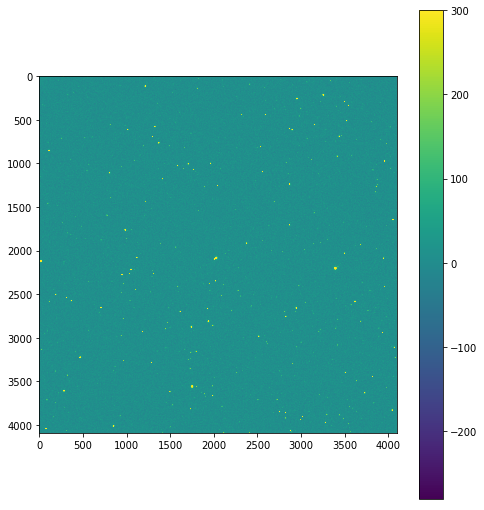

In [10]:
ShowObsFrame(observation,'bias',0)

Min: 1123.0
Max: 49098.0
Median: 1276.0
Std:  31.4757222104


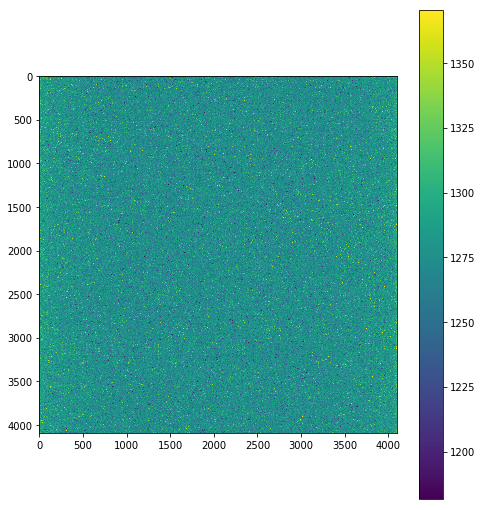

In [11]:
ShowObsFrame(observation,'dark',0)

Min: 0.0
Max: 0.0
Median: 0.0
Std:  0.0


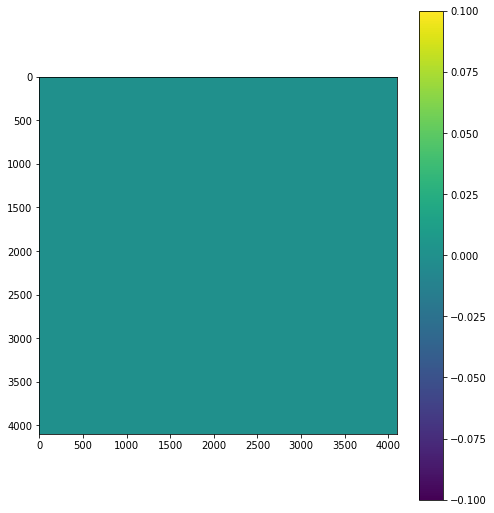

In [12]:
ShowObsFrame(observation,'flat',9)

Min: 0.0
Max: 0.0
Median: 0.0
Std:  0.0


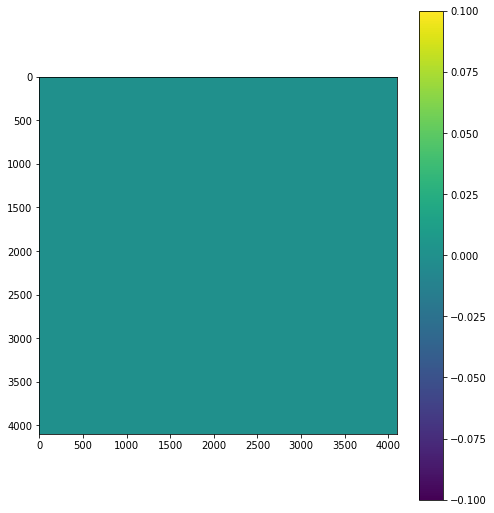

In [13]:
ShowObsFrame(observation,'data',1)

In [14]:
bias = observation['bias']['frames'].mean(axis=2)
dark = (observation['dark']['frames']).mean(axis=2)
flat = observation['flat']['frames'].mean(axis=2)
data = observation['data']['frames'].mean(axis=2)
#from scipy.stats import mode

In [15]:
normflat = (flat - bias)/(np.median(flat-bias))
#best = (data - dark - bias)
#print(best.shape)

Min: -18.6363636364
Max: 5545.15454545
Median: 0.863636363636
Std:  8.81128969012


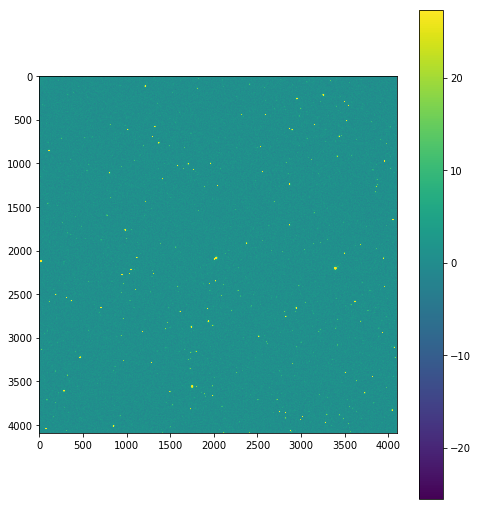

In [16]:
ShowImage(bias)

Min: 1238.9
Max: 49135.0
Median: 1274.6
Std:  27.9866784351


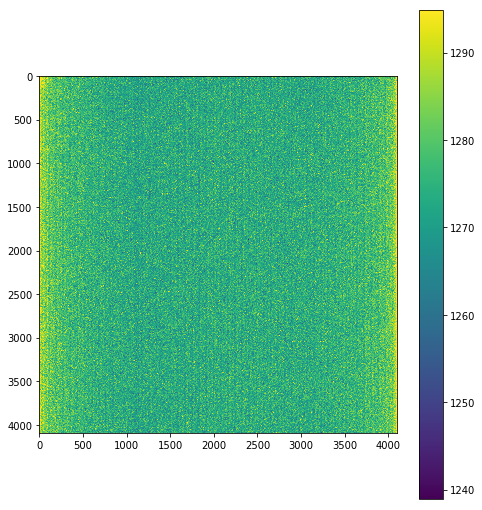

In [17]:
ShowImage(dark,vmin=dark.min(),vmax=dark.min()+2.*np.std(dark))

Min: -2077.83636364
Max: 43589.8454545
Median: 1273.73636364
Std:  26.012961693


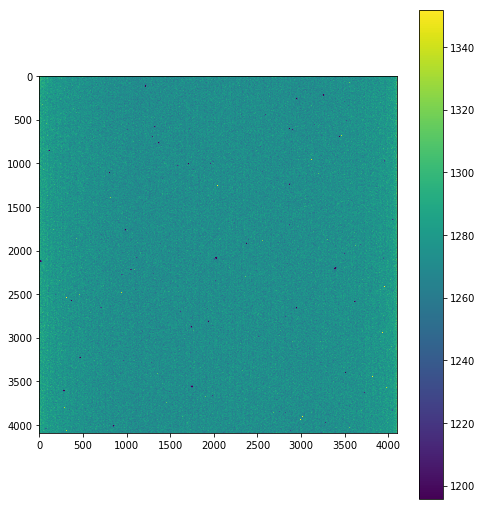

In [18]:
ShowImage(dark-bias)

Min: -21.5789473684
Max: 6420.70526316
Median: 1.0
Std:  10.202545957


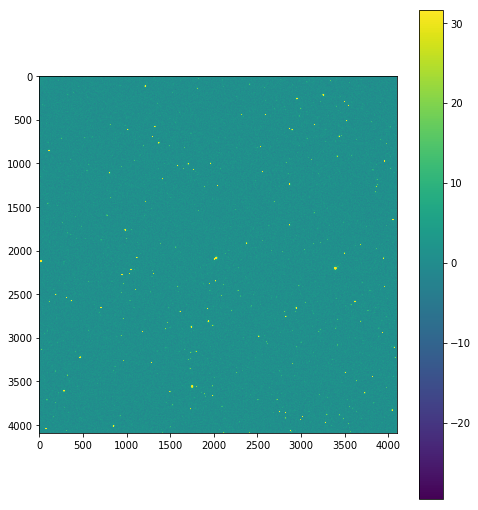

In [19]:
ShowImage(normflat)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Min: nan
Max: nan
Median: nan
Std:  nan


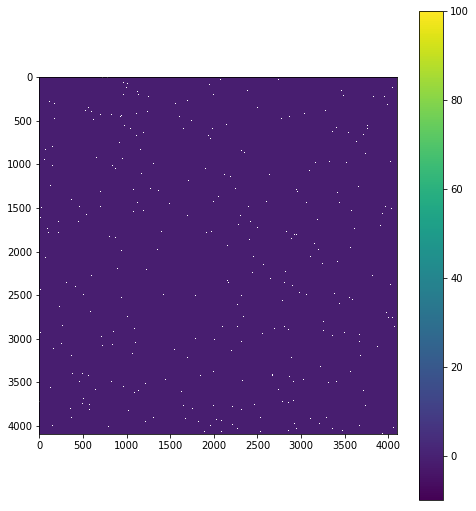

In [20]:
image_processed = (data-bias)/normflat
ShowImage(image_processed,vmin=-10,vmax=100)

In [ ]:
hdu = fits.PrimaryHDU(data)
hdu.writeto('mthopkinsdata/data_avg.fits',overwrite=True)
hdu = fits.PrimaryHDU(data-bias)
hdu.writeto('mthopkinsdata/data_minus_bias.fits',overwrite=True)
hdu = fits.PrimaryHDU(image_processed)
hdu.header = observation['data']['hdrs'][0]
hdu.writeto('mthopkinsdata/data_processed.fits',overwrite=True)

In [7]:
image_processed.max()

NameError: name 'image_processed' is not defined

In [21]:
h,be = np.histogram(image_processed,bins='auto')

ValueError: range parameter must be finite.

In [35]:
h.shape

(531949,)

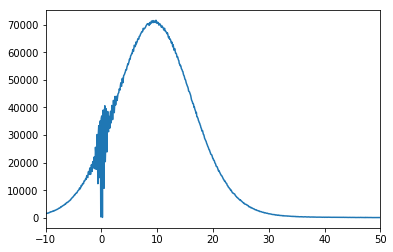

In [36]:
plt.plot(be[1:],h)
plt.xlim([-10,50])
plt.show()

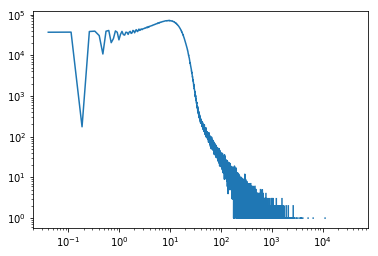

In [37]:
plt.loglog(be[1:],h)
#plt.xlim([-10,50])
plt.show()